Topic 6.07  |  三角网格
# 颗粒度
Book_2《可视之美》 | 鸢尾花书：从加减乘除到机器学习  

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri

import os
# 如果文件夹不存在，创建文件夹
if not os.path.isdir("Figures"):
    os.makedirs("Figures")

### 最小颗粒度

In [17]:
corners = np.array([[0, 0], [1, 0], [0.5,0.75**0.5]])
# 定义等边三角形的三个顶点

triangle = tri.Triangulation(corners[:, 0], corners[:, 1])
# 构造三角形剖分对象

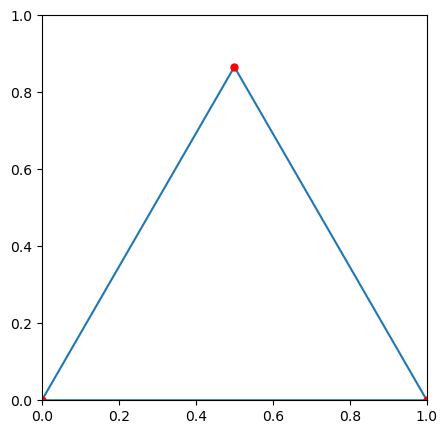

In [18]:
from scipy.spatial import Delaunay
tri_from_scipy = Delaunay(corners)

fig, ax = plt.subplots(figsize = (5,5))
ax.triplot(corners[:,0], corners[:,1], tri_from_scipy.simplices)
ax.plot(corners[:,0], corners[:,1], '.r', markersize = 10)

ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
fig.savefig('Figures/三角剖分，最小颗粒度.svg', format='svg')

### 不断提高颗粒度

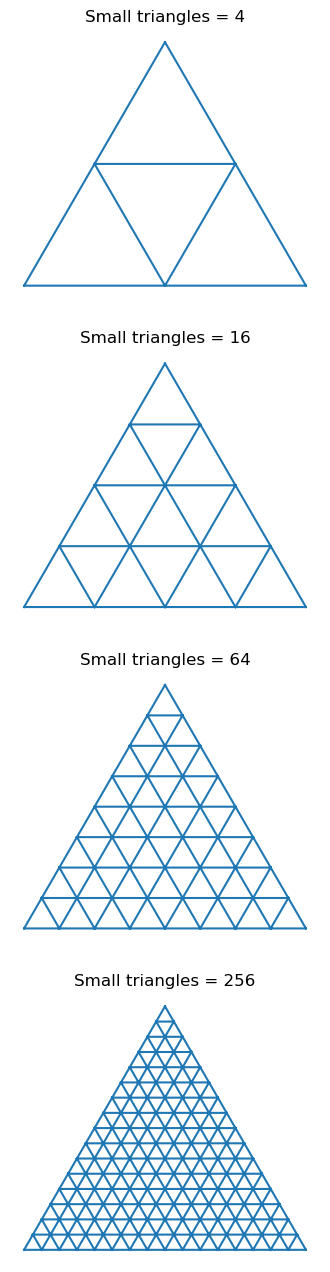

In [19]:
refiner = tri.UniformTriRefiner(triangle)
subdiv_array = [1,2,3,4]

fig, ax = plt.subplots(figsize = (4,16))

for idx, subdiv_idx in enumerate(subdiv_array):
    
    trimesh_idx = refiner.refine_triangulation(subdiv=subdiv_idx)
    # 等边三角形被细化成4**subdiv 个三角形
    
    plt.subplot(4, 1, idx + 1)
    
    plt.triplot(trimesh_idx)
    plt.axis('off')

    plt.axis('equal')
    plt.title('Small triangles = ' + str(4**subdiv_idx))

fig.savefig('Figures/三角剖分，不断提高颗粒度.svg', format='svg')

In [ ]:
# Repo: https://github.com/Visualize-ML
# Book 2 Beauty of Visualization  |  From Basic Arithmetic to Machine Learning
# Published and copyrighted by Tsinghua University Press
# Beijing, China, 2023